In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))
#fig = plt.figure(1,figsize=(7, 5)) ## To save figure.

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

<Figure size 504x360 with 0 Axes>

In [2]:
import sys,os
import copy
import scipy.linalg

In [3]:
def Numerov(Delta, StartI, EndI, MaxSol, FArr,\
            Sing, PhiStart, PhiNext):
    '''
    This is a stand-alone subroutine. So it can be defined previously.
    C Integrates the Schrodinger equation. The initial values
    C of the solution are PhiStart and PhiNext resectively. The integration
    C step is Delta, and the integration steps run from StartI to EndI. StartI may be larger
    C than EndI; in that case, integration is performed backward.
    C The output values is the solution, stored in the array "Solution".
    C Sing determines whether the potential contains a singularity at
    C r=0.
    C If there is a singularity at r=0, the value of the Numerov
    C function w at r=0 is taken equal to PhiStart, and not
    C equal to PhiStart/(1-h^2 FArr/12).
    
    C This array is declared with linear size MaxSol.
    C Delta is the integration step.
    C The equation solved is
    C Psi''(R_I) = FArr(I) Psi(R_I)
    C FArr must therefore be filled with the appropriate values before
    C calling the present routine. In the case of the radial
    C Schrodinger equation, FArr would contain the values
    C FArr(I) = 
    '''
    Solution = np.zeros(MaxSol)
    ## print("MaxSol in Numerov: ", MaxSol)
    if (Delta<0):
        IStep = -1
    else:
        IStep = 1

    DeltaSq = Delta*Delta
    Fac = DeltaSq/12.0E0

    if (Sing):
        # print ("True!")
        WPrev = PhiStart
    else:
        WPrev = (1.0-Fac*FArr[StartI-1])*PhiStart
        Solution[StartI-1] = PhiStart

    # print("StartI: ", StartI)
    # print("WPrev: ", WPrev)
    # print("IStep: ", IStep)
    Phi = PhiNext
    Solution[StartI+IStep-1] = PhiNext
    # print ("%8d %20.6f" % (StartI+IStep-1,Solution[StartI+IStep-1]))
    W   = (1-Fac*FArr[StartI+IStep-1])*Phi
    # print ("W = %20.6e" % (W))

    N_start = StartI+IStep-1
    N_final = EndI - IStep + 1
    ## print("Nstart, Nfinal: ",N_start,N_final)
    for I in range(N_start, N_final, IStep):
        # print(I,I+IStep)
        WNext = W*2.0E0 - WPrev + DeltaSq*Phi*FArr[I]
        WPrev = W
        W     = WNext
        Phi   = W/(1.0E0-Fac*FArr[I+IStep])
        ## print("I+IStep: ",I+IStep)
        Solution[I+IStep] = Phi
        
    return Solution



<img src="./fig/fcc.png" alt="Brillouin zone of the fcc lattice." style="height: 440px; width:600px;"/>

W. Setyawan, S. Curtarolo, *Computational Materials Science* **49** (2010) 299–312

In [ ]:
class Test_only(object):
    def __init__(self):
        self.PI = np.pi
    def F1(self,k0):
        k = np.int(k0)
        for i in range(k):
            print("PI: ", self.PI)
        return
    def F2(self):
        print("In F2.")
        self.F1(3)
        return

In [ ]:
y = Test_only()

In [ ]:
y.F1(5)
y.F2()

In [ ]:
test_K = np.zeros(3,dtype=int)
print(test_K)

In [ ]:
test_KVec = np.zeros((27,3),dtype=int)
ff = open('./Thijssen_code/ch6/apw/KVectors','r')

for I in range(27):
    lines = ff.readline()
    line = lines.split()
    test_KVec[I,0] = np.int(line[0])
    test_KVec[I,1] = np.int(line[1])
    test_KVec[I,2] = np.int(line[2])
    print("%8d %8d %8d" % (test_KVec[I,0],test_KVec[I,1],test_KVec[I,2]))
    
ff.close()



In [4]:
#### For testing of dgetrf in Python.
import scipy.linalg

A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
LU,P,info = scipy.linalg.lapack.dgetrf(A)
print(A)
print("====")
print(LU)
print("P:")
print(P)

[[ 7  3 -1  2]
 [ 3  8  1 -4]
 [-1  1  4 -1]
 [ 2 -4 -1  6]]
====
[[ 7.          3.         -1.          2.        ]
 [ 0.42857143  6.71428571  1.42857143 -4.85714286]
 [-0.14285714  0.21276596  3.55319149  0.31914894]
 [ 0.28571429 -0.72340426  0.08982036  1.88622754]]
P:
[0 1 2 3]


# Theory

Here we use augmented plane wave (APW) method, also called muffin-tin potential.

Outside the muffin tin spheres, one use plane wave: 
$$\begin{aligned}
\psi^{\rm{PW}}_{\boldsymbol{q}}(\boldsymbol{r}) & =e^{i\boldsymbol{q}\cdot\boldsymbol{r}} \\
\boldsymbol{q} & = \boldsymbol{k} + \boldsymbol{K} \\
\end{aligned}$$

Inside the sphere, we use the atomic orbital:

$$\begin{aligned}
\sum_{l=0}^{\infty}\sum_{m=-l}^{l}A_{lm}\mathcal{R}_l(r)Y^{l}_{m}(\theta,\phi) \\
\end{aligned}$$

Here $V(r)$ can be exact Coulomb potential, K-S DFT functionals, or effective potential.

Where $\mathcal{R}_l(r)$
$$\begin{aligned}
\left\{-\frac{1}{2r}\frac{{\rm{d}}^2}{{\rm{d}}r^2}r + \left[\frac{l(l+1)}{2r^2}+V(r)\right] \right\} \mathcal{R}_l(r) & = E \mathcal{R}_l(r) \\
\end{aligned}$$

in APW, we match these two wave functions at the boundary, using the spherical harmonic expansion of plane wave (Messiah, Quantum Mechanics, Vol. 1, pp. 426)
$$\begin{aligned}
e^{i\boldsymbol{q}\cdot \boldsymbol{r}} & = \sum_{l=0}^{\infty} (2l+1)i^{l}j_{l}(qr)P_{l}(\cos{(\theta'})) \\
\end{aligned}$$
Here the angle $\theta'$ is the angle between $\boldsymbol{r}$ and $\boldsymbol{q}$.

With the help of addtion formula of spherical harmonics, and the complex conjugate relation (Cohen-Tannoudji, Quantum Mechanics, second edition, 2020, pp. 712 (55), 714 (70)
):
$$\begin{aligned}
P_{l}(\cos(\theta')) & =\frac{4\pi}{2l+1} \sum_{m=-l}^{l}(-1)^{m}Y^{l}_{-m}(\theta_{\boldsymbol{q}},\phi_{\boldsymbol{q}})Y^{l}_{m}(\theta,\phi) \\
(-1)^{m}Y^{l}_{-m} & = (Y^{l}_{m})^{*} \\
\end{aligned}$$

$$\begin{aligned}
e^{i\boldsymbol{q}\cdot \boldsymbol{r}} & = 4\pi\sum_{l=0}^{\infty}\sum_{m=-l}^{l} i^{l}j_{l}(qr)(Y^{l}_{m})^{*}(\theta_{\boldsymbol{q}},\phi_{\boldsymbol{q}})Y^{l}_{m}(\theta,\phi) \\
\end{aligned}$$

In practice, we just use limited angular quantum numbers:
$$\begin{aligned}
\sum_{l=0}^{\infty}\rightarrow \sum_{l=0}^{l_{\rm{max}}},\quad l_{\rm{max}}=3{\rm{\, \, or\, \, }}4 \\
\end{aligned}$$

This matching condition fixes the coefficients $A_{lm}$, and we have:
$$\begin{aligned}
\psi^{\rm{PW}}_{\boldsymbol{q}}(\boldsymbol{r}) & = 
4\pi \sum_{l,m} i^{l}\left[\frac{j_{l}(qR)}{\mathcal{R}_{l}(R)}\right] \mathcal{R}_l(r)(Y^{l}_{m})^{*}(\theta_{\boldsymbol{q}},\phi_{\boldsymbol{q}})Y^{l}_{m}(\theta,\phi)
\\
\end{aligned}$$

Here $R$ is the boundary of the muffin-tin potential.

So finally with linear combination of APW wave functions, we can reach the best estimation of wave function:
$$\begin{aligned}
\psi_{\boldsymbol{k}}(\boldsymbol{r}) = \sum_{\boldsymbol{K}}C_{\boldsymbol{K}}\psi^{\rm{PW}}_{\boldsymbol{k}+\boldsymbol{K}}(\boldsymbol{r})  \\
\end{aligned}$$

by solving a familiar equation:
$$\begin{aligned}
{\boldsymbol{\rm{H}}}{\boldsymbol{\rm{C}}} = E {\boldsymbol{\rm{S}}}{\boldsymbol{\rm{C}}}
\end{aligned}$$

But this is not a normal generalized eigenvalue prolem, since ${\boldsymbol{\rm{H}}}$ depends on energy $E$.
So we change its form, into:
$$\begin{aligned}
& (\mathcal{H}-E){\boldsymbol{\rm{C}}} =0 \\
& \mathcal{H} = {\boldsymbol{\rm{H}}}- E {\boldsymbol{\rm{S}}} +  E {\boldsymbol{\rm{I}}} \\
\end{aligned}$$

This problem thus changed into root-finding problem. In practice, it is hard, one can resort to Jos Thijssen's textbook. 


The matrix elements $\mathcal{H}_{ij}$ can be derived as:

$$\begin{aligned}
\mathcal{H}_{ij} & = \langle \boldsymbol{k}+\boldsymbol{K}_i \vert \mathcal{H}\vert \boldsymbol{k}+\boldsymbol{K}_j \rangle =
-EA_{ij} + B_{ij} + \sum_{l=0}^{l_{\rm{max}}} C_{ijl}\frac{\mathcal{R}'_{l}(R)}{\mathcal{R}_{l}(R)}
\end{aligned}$$

$$\begin{aligned}
A_{ij} & = \frac{-4\pi R^2 j_l(\vert\boldsymbol{K}_i-\boldsymbol{K}_j \vert R)}{\vert\boldsymbol{K}_i-\boldsymbol{K}_j \vert} + \delta_{ij} \\
B_{ij} & = \frac{1}{2}A_{ij}(\boldsymbol{q}_i\cdot\boldsymbol{q}_j )\quad \boldsymbol{q}_{\lambda} = \boldsymbol{k}+\boldsymbol{K}_{\lambda},\, \, \lambda=i,j \\
 C_{ijl} & = (2l+1)\frac{2\pi R^2}{\Omega}P_{l}(\cos(\theta_{ij}))j_l(q_i R)j_{l}(q_j R) \\
 \cos(\theta_{ij}) & =\frac{\boldsymbol{q}_i\cdot\boldsymbol{q}_j}{q_i q_j} \\
\end{aligned}$$

In this practice, we try to deal with copper. It hase $Z=29$, and lattice constant $a=6.822\, \, {\rm{a.u.}}$. The unit cell volume $\Omega = 3a^3/4$. Other information can be found in standard textbooks of solid state physics. 
$$\begin{aligned}
\boldsymbol{b}_1 & = \frac{2\pi}{a}(-1,1,1)^{\rm{T}} \\
\boldsymbol{b}_2 & = \frac{2\pi}{a}(1,-1,1)^{\rm{T}} \\
\boldsymbol{b}_3 & = \frac{2\pi}{a}(1,1,-1)^{\rm{T}} \\
\end{aligned}$$

Here we start of 27 $\boldsymbol{K}=n_i \boldsymbol{b}_i $ values, and then add its number to 113. And beware the norm of $\boldsymbol{K}$ is:
$$\begin{aligned}
\vert \boldsymbol{K} \vert =\frac{2\pi}{a} \sqrt{3n^2_1+3n^2_2+3n^2_3-2n_1n_2-2n_2n_3-2n_1n_3} \\
\end{aligned}$$

Here we also use a parametrized effective core potential:

$$\begin{aligned}
V(r) = Z e^{-ar^b+cr^d}(-\alpha r -\beta r^2 + \gamma r^3 - \delta r^4)
\end{aligned}$$

In [13]:
class APW_Cu(object):
    def __init__(self):
        self.PI = np.pi
        Point1    =np.array([0.0E0 , 0.0E0 , 0.0E0],dtype=float)
        Point2    =np.array([0.5E0 , 0.5E0 , 0.5E0],dtype=float)
        Point3    =np.array([0.75E0, 0.75E0, 0.0E0],dtype=float)
        Point4    =np.array([1.0E0 , 0.0E0 , 0.0E0],dtype=float)
        Point5    =np.array([1.0E0 , 0.5E0 , 0.0E0],dtype=float)
        self.GammaPoint = np.zeros(3)
        self.LPoint     = np.zeros(3)
        self.KPoint     = np.zeros(3)
        self.XPoint     = np.zeros(3)
        self.WPoint     = np.zeros(3)
        for I in range(3):
            self.GammaPoint[I] = Point1[I]
            self.LPoint[I]     = Point2[I]
            self.KPoint[I]     = Point3[I]
            self.XPoint[I]     = Point4[I]
            self.WPoint[I]     = Point5[I]
        self.LatConst = 6.8219117E0 ## in a.u. 
        self.RecLatConst = 2.0E0*self.PI/self.LatConst ## 2 \pi / L
         
        #                           ## b_1 = (2\pi/a)(-1,1,1)^{T}; 
        #                           ## b_2 = (2\pi/a)(1,-1,1)^{T};
        #                           ## b_3 = (2\pi/a)(1,1,-1)^{T}.
        self.UnitVol = (self.LatConst**3)/4.0E0
        
        self.NumberKA=27 ### Finally one can use 113.
        self.MaxL=5      ### One can try larger l_{max} vlues.
        self.MaxSol=10000
        self.RMuffinTin = 2.41191E0
        
        self.DistMatrix = np.zeros((13,13,13),dtype=int)
        for I in range(-6,6+1,1):
            for J in range(-6,6+1,1):
                for K in range(-6,6+1,1):
                    self.DistMatrix[I,J,K] = 3*(I*I+J*J+K*K)-2*I*J-2*J*K-2*I*K

        #*** The K-vectors of the reciprocal lattice which label
        #*** the basis vectors in this calculation are read from
        #*** a file 'KVectors'.
        self.KVec = np.zeros((self.NumberKA,3),dtype=int)
        ff = open('./Thijssen_code/ch6/apw/KVectors','r')
        for I in range(self.NumberKA):
            lines = ff.readline()
            line = lines.split()
            self.KVec[I,0] = np.int(line[0])
            self.KVec[I,1] = np.int(line[1])
            self.KVec[I,2] = np.int(line[2])
        ff.close()
        
        self.MatA=np.zeros((self.NumberKA, self.NumberKA))
        self.MatB=np.zeros((self.NumberKA, self.NumberKA))
        self.MatC=np.zeros((self.NumberKA, self.NumberKA, self.MaxL+1)) ###
        self.ChiR =np.zeros(self.MaxL+1)
        self.ChiDotR=np.zeros(self.MaxL+1)
        self.FArr = np.zeros(self.MaxSol)
        self.PotNum = 0
        return
        
    def MakeLine (self,FirstPoint, SecPoint):
        '''
        C *** A line in the IBZ is scanned. On a series of points on this
        C *** line, the Hamiltonian is diagonalised.
        '''
        StepArr = np.zeros(3)
        kBZ     = np.zeros(3)
        Step    = np.zeros(3)
        StepLength = 0.02E0 ### Default value: 0.02
        
        for L in range(3):
            StepArr[L] = SecPoint[L]-FirstPoint[L]

        Length = StepArr[0]**2+StepArr[1]**2+StepArr[2]**2
        Length = np.sqrt(Length)
        
        Num = np.int(Length/StepLength)
        
        print('nr of steps', Num)

        for L in range(3):
            Step[L] = StepArr[L]/Num

        for L in range(3):
            kBZ[L] =  FirstPoint[L]
        
        kBZ_traj = []
        for J in range(Num+1):
            for L in range(3):
                kBZ[L] = FirstPoint[L] + J*Step[L]
            kBZ_traj.append(kBZ[0])
            ## print("Before Spectrum: %8.3f %8.3f %8.3f" % (kBZ[0],kBZ[1],kBZ[2]))
            ## sys.exit() ## For test only!
            self.Spectrum(kBZ,J)
        return kBZ_traj
    
    def Spectrum (self,kBZ,iFile):
        '''
        C Calculates the energy spectrum at the point kBZ in the
        C Brillouin zone.
        INTEGER I, J, StepNum
        DOUBLE PRECISION kBZ(3), Energy, Deter,
        PrevDet, PPrevDet, EStep,
        BestEner
        
        C Two subroutine calls: 
        BuildABC()
        FindDeter()
        '''

        print ("start spectrum. KbZ = %10.5f %10.5f %10.5f" %(kBZ[0],kBZ[1],kBZ[2]))
        self.BuildABC(kBZ) ### Construct the matrix element.
        PPrevDet = 0.0E0 
        PrevDet = 0.00E0 
        I = 0            
        StepNum = 100    ## Local, default value is 100.
        EStep = 0.38E0/StepNum 
        
        ff=open('spectrum_'+'{:03d}'.format(iFile)+'.txt','w')
        for J in range(StepNum):
            Energy=-0.04E0+np.float(J)*EStep
            Deter = self.FindDeter(Energy)    #### Find the determinant of | \mathcal{H}-E |, under given E.
            if (Deter*PrevDet<0.0E0): ## Find the E making | \mathcal{H}-E | change its sign.
                I = I+1 # Linear interpolation in the energy to fine zero of the determinant
                str_tmp = '{:8d}'.format(I)+\
    '{:16.10f}'.format(Energy+Deter*2*EStep/(PrevDet-Deter))+'\n'
                ff.write(str_tmp)
            else:
                if (((PrevDet-Deter)*(PrevDet-PPrevDet)> 0.0E0) and \
 (np.abs(PrevDet)< np.abs(Deter)) and \
 (np.abs(PrevDet)< np.abs(PPrevDet)) and 
 (Energy > -0.04E0+EStep)): # Quadratic interpolation in energy to find the minimum of the determinant
                    BestEner = Energy+\
                    0.5E0*EStep*(-PPrevDet-3*PrevDet+4*Deter)/ \
                    (PPrevDet-2*PrevDet+Deter)
                    I = I+1
                    str_tmp = '{:8d}'.format(I)+'{:16.10f}'.format(BestEner)+'\n'
                    ff.write(str_tmp )
            PPrevDet = PrevDet
            PrevDet = Deter
        ff.close()
        return
    
    def BuildABC(self,kBZ):
        '''
        The A, B and C-matrices are filled according to Eq. (6.28)
        Messiah, Quantum Mechanics, Vol. 1, pp. 444
        
        Local variables:
        INTEGER I, J, L, DeltaK(3)
        DOUBLE PRECISION Arg1, Arg2, Arg3, 
                        PreFac, kBZ(3),
                        KTot(3), QTot(3), 
                        Dist, J1,
                        JL1, JL2, InnerProd, KdotQ,
                        KNorm, QNorm, X, SphBesJ, Legendre
        '''
        DeltaK = np.zeros(3,dtype=int)
        KTot   = np.zeros(3)
        QTot   = np.zeros(3)
        
        PreFac = 2.0E0*self.PI*self.RMuffinTin**2/self.UnitVol ## Local

        for I in range(self.NumberKA):
            for J in range(I+1):
                for L in range(3):
                    DeltaK[L] = self.KVec[I, L] - self.KVec[J,L]

                self.MatA[I, J] = 0.0E0
                self.MatB[I, J] = 0.0E0
                Dist = \
                np.sqrt(np.float(self.DistMatrix[DeltaK[0],DeltaK[1],DeltaK[2]]))\
                *self.RecLatConst
                KTot[0] = kBZ[0] - self.KVec[I,0] + self.KVec[I,1] + self.KVec[I,2]
                KTot[1] = kBZ[1] + self.KVec[I,0] - self.KVec[I,1] + self.KVec[I,2]
                KTot[2] = kBZ[2] + self.KVec[I,0] + self.KVec[I,1] - self.KVec[I,2]
                QTot[0] = kBZ[0] - self.KVec[J,0] + self.KVec[J,1] + self.KVec[J,2]
                QTot[1] = kBZ[1] + self.KVec[J,0] - self.KVec[J,1] + self.KVec[J,2]
                QTot[2] = kBZ[2] + self.KVec[J,0] + self.KVec[J,1] - self.KVec[J,2]
                KdotQ = np.dot(KTot, QTot)*self.RecLatConst**2 ## Local
                KNorm = np.sqrt(np.dot(KTot, KTot))*self.RecLatConst ## Local
                QNorm = np.sqrt(np.dot(QTot, QTot))*self.RecLatConst ## Local
                X = Dist*self.RMuffinTin 
                if (X > 1.0E-8):
                    J1 = (np.sin(X)/X-np.cos(X))/X
                    J1 = J1/Dist
                else:
                    J1 = self.RMuffinTin/3.0E0
          
                self.MatA[I, J] = -2.0E0*PreFac*J1
                self.MatB[I, J] = self.MatA[I,J]*0.5E0*KdotQ
                Arg1 = QNorm*self.RMuffinTin
                Arg2 = KNorm*self.RMuffinTin
                if (KNorm > 1.0E-8 and QNorm> 1.0E-8):
                    Arg3 = KdotQ/KNorm/QNorm
                else:
                    Arg3 = 1.0E0-1.0E-10
                for L in range(self.MaxL+1): ## do L =0, MaxL
                    if (Arg1> 1.0E-8):
                        JL1=self.SphBesJ (L, Arg1)
                    elif (L==0):
                        JL1 = 1.0E0
                    else:
                        JL1 = 0.0E0

                    if (Arg2>1.0E-8):
                        JL2=self.SphBesJ (L, Arg2)
                    elif (L==0):
                        JL2 = 1.0E0
                    else:
                        JL2 = 0.0E0

                    self.MatC[I,J, L] = (2*L+1)*PreFac*self.Legendre(L,Arg3)*JL1*JL2

                if (I==J):
                    self.MatA[I,I] = self.MatA[I,I] + 1.0E0
                    self.MatB[I,I] = self.MatB[I,I] + 0.5E0*KdotQ
        
        return
    def FindDeter(self,Energy):
        '''
        C Find the determinant. An LU decomposition is preformed on the
        C Hamiltonian at energy "Energy", and the diagonal elements are
        C multiplied to obtain the determinant Deter.
        
        DOUBLE PRECISION Energy, HMatrix(NumberKA, NumberKA), D,
                        Deter, Deter1, TMat(NumberKA, NumberKA), D1,
                        Work(NumberKA), PlayMate(NumberKA, NumberKA)

        INTEGER J, IPIVOT(NumberKA), INFO, I1, I2, Sign
        '''
        
        HMatrix=np.zeros((self.NumberKA, self.NumberKA))
        IPIVOT =np.zeros(self.NumberKA,dtype=int)
        
        HMatrix = self.FillH(Energy)

        LU,IPIVOT,INFO = scipy.linalg.lapack.dgetrf(HMatrix)
        ### A = P*L*U, and | Det(A)| = \prod_i L_{ii}
        # print(LU)
        # sys.exit()
        HMatrix = copy.deepcopy(LU)
        D = 1.0E0
        for J in range(self.NumberKA):
            if (IPIVOT[J]==J):
                D = D*HMatrix[J,J]
            else:
                D = -D*HMatrix[J,J]
        Deter = D
        return Deter
    
    def FillH(self, Energy):
        '''
        C The Hamiltonian "HMatrix" is calculated at energy E,
        C using Eq. (6.27)
        '''
        ## print ("In FillH!")
        HMatrix = np.zeros((self.NumberKA,self.NumberKA))
        self.AtomInt(Energy) ### Calculate R_l(r), R'_l(r)
        for I in range(self.NumberKA):
            for J in range(I+1):
                HMatrix[I, J] = 0.0E0
                HMatrix[I, J] = -Energy*self.MatA[I, J] + self.MatB[I, J]
                for L in range(self.MaxL+1):
                    HMatrix[I,J] = HMatrix[I,J] + self.MatC[I, J, L]*self.ChiDotR[L]/self.ChiR[L]
                HMatrix[J,I] = HMatrix[I,J]
        return HMatrix

    def AtomInt(self,Energy):
        '''
        C Integration of the radial Schrodinger equation  at energy E
        C (actually performed inside the routine "atom").
        C Value and derivative at MT boundary are Phi and PhiDer
        C respectively. These are stored for every L-value in the arrays
        C ChiR and ChiDotR
        '''
        for L in range(self.MaxL+1):
            Phi, PhiDer = self.Atom(Energy,L)
            self.ChiR[L] = Phi
            self.ChiDotR[L] = PhiDer
        return
    
    def Atom(self,Energy,L):
        '''
        C Atom initialises the starting values for the radial integration,
        C it calls Numerov to perform this integration for angular momentum L
        C and energy E, and returns the value and derivative of the solution
        C in PhiMax and PhiDer Max respectively
        '''
        self.PotNum = np.int(1000/(L+1))
        self.HStep=self.RMuffinTin/self.PotNum

        self.FillFArr(0, self.PotNum, L, Energy) ##

        if (L==0):
            PhiStart = 2*self.HStep**2*29.0E0/12.0E0 ## Z(Cu) = 29
        else:
            PhiStart = 0.0E0 ## PhiStart is local.
        PhiNext = self.HStep**(L+1)
        Solution = Numerov(self.HStep, 0, self.PotNum, self.MaxSol, self.FArr,\
                           True, PhiStart, PhiNext)
        PhiMax = Solution[self.PotNum-1] ## PhiMax is local.
        PhiMax = PhiMax/self.RMuffinTin
# A somewhat complicated expression is used to calculate the derivative
# at the last point, with accuracy of order h^3
        DerPhiMax = (Solution[self.PotNum-1]-Solution[self.PotNum-2])/self.HStep \
    +0.125E0*self.HStep*(3*self.FArr[self.PotNum-1]*Solution[self.PotNum-1]+\
                    self.FArr[self.PotNum-2]*Solution[self.PotNum-2])
        DerPhiMax = (DerPhiMax-PhiMax)/self.RMuffinTin

        return PhiMax,DerPhiMax
    def FillFArr(self,First, Last, L, Ener):
        '''
        C Fill the array FArr = F(R, L, E) (see below)
        C for use in the Numerov routine
        '''
        for I in range(First,Last): ## First starts from 0.
            R = (I+1)*self.HStep
            self.FArr[I] = L*(L+1)/(R*R) - 2*(self.Vcu(R)/R + Ener) ### Angular part and Param. potential of Cu.
        return
    
    def Vcu(self,R):
        '''
        C Parametrisation of the potential
        
        Here 29 is Z_{Cu}.
        '''
        Vcu_Value = 29*np.exp(-2.3151241717834E0*R**0.81266614122432E0+ \
                              2.1984250222603E-02*R**4.2246376280056E0) \
        -0.15595606773483E0*R-3.1350051440417E-03*R**2+\
        5.1895222293006E-02*R**3 - 2.8027608685637E-02*R**4
        return Vcu_Value

    def SphBesJ (self,L, X):
        '''
        C Returns the spherical bessel function j_l(x) as a function of l and x
        C Upward recursion is used; therefore reliable for a restricted number of
        C l-values
        INTEGER L, HelpL

        DOUBLE PRECISION X, JL, JlMin1, JlMin2, HelpSin
        '''
        eps = 1.0E-8
        if np.abs(X)<eps:
            X += eps
        if (L==0):
            SphBesJ_Value = np.sin(X)/X
        elif (L==1):
            SphBesJ_Value = (np.sin(X)/X-np.cos(X))/X
        else:
            HelpSin =  np.sin(X)
            JlMin1 = HelpSin/X
            Jl     = (HelpSin/X-np.cos(X))/X
            for HelpL in range(2,L+1,1):
                JlMin2 = JlMin1
                JlMin1 = Jl
                Jl = (2*HelpL-1)*JlMin1/X - JlMin2
            SphBesJ_Value = Jl
        return SphBesJ_Value
    def SphBesN (self,L, X):
        ### Avoid a small x near zero.
        eps = 1.0E-8

        if np.abs(X)<eps:
            X += eps
        #############
        ###########################
        if L==0:
            SphBesN_Value = -np.cos(X)/X
        elif L==1:
            SphBesN_Value = -(np.cos(X)/X - np.sin(X))/X
        else:
            HelpCos = np.cos(X)
            NlMin1  = -HelpCos/X
            Nl      = -(HelpCos/X - np.sin(X))/X
            for HelpL in range(2,L+1,1):
                NlMin2 = NlMin1
                NlMin1 = Nl
                Nl     = (2*HelpL - 1)*NlMin1/X - NlMin2
            SphBesN_Value = Nl
        return SphBesN_Value
    def Legendre (self,L, X):
        eps = 1.0E-8
        if np.abs(X)<eps:
            X += eps
        if (L==0):
            Legendre_V = 1.0E0
        elif (L==1):
            Legendre_V = X
        else:
            PlMin1 = 1.0E0
            Pl     = X
            for HelpL in range(2,L+1,1):
                PlMin2 = PlMin1
                PlMin1 = Pl
                Pl = (2*HelpL-1)*X*PlMin1 - (HelpL-1)*PlMin2
                Pl = Pl/(HelpL)
            Legendre_V = Pl
        return Legendre_V
    

In [14]:
y = DFT_Cu()
kBZ_traj = y.MakeLine(y.GammaPoint, y.KPoint)

nr of steps 53
start spectrum. KbZ =    0.00000    0.00000    0.00000
start spectrum. KbZ =    0.01415    0.01415    0.00000
start spectrum. KbZ =    0.02830    0.02830    0.00000
start spectrum. KbZ =    0.04245    0.04245    0.00000
start spectrum. KbZ =    0.05660    0.05660    0.00000
start spectrum. KbZ =    0.07075    0.07075    0.00000
start spectrum. KbZ =    0.08491    0.08491    0.00000
start spectrum. KbZ =    0.09906    0.09906    0.00000
start spectrum. KbZ =    0.11321    0.11321    0.00000
start spectrum. KbZ =    0.12736    0.12736    0.00000
start spectrum. KbZ =    0.14151    0.14151    0.00000
start spectrum. KbZ =    0.15566    0.15566    0.00000
start spectrum. KbZ =    0.16981    0.16981    0.00000
start spectrum. KbZ =    0.18396    0.18396    0.00000
start spectrum. KbZ =    0.19811    0.19811    0.00000
start spectrum. KbZ =    0.21226    0.21226    0.00000
start spectrum. KbZ =    0.22642    0.22642    0.00000
start spectrum. KbZ =    0.24057    0.24057    0.0

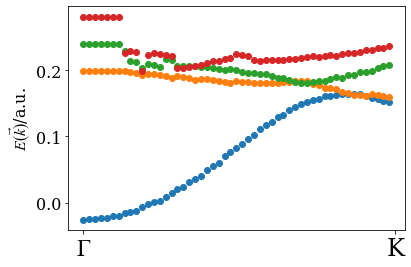

In [15]:
N_tot= 53
ene_traj = np.zeros((N_tot,10))
N_ene = 4

for j in range(N_tot):
    ff = open('/Users/yongleli/Course/Course2021/Comput_Phys_2021/spectrum_'+'{:03d}'.format(j)+'.txt')
    ene = np.zeros(N_ene)
    for i in range(N_ene):
        lines = ff.readline()
        if lines:
            line = lines.split()
            ene[i] = np.float(line[1])
        else:
            ene[i] = 0.0E0
    ff.close()
    for k in range(N_ene):
        ene_traj[j,k] = ene[k]
    
    
for k in range(N_ene):
    plt.plot(kBZ_traj[:-1],ene_traj[:,k],'o')
plt.xticks([0.0,0.75],[r"$\Gamma$",r"K"],fontsize=24)
plt.ylabel(r"$E(\vec{k})$/a.u.")
figname ='Cu_APW_few.png'
plt.tight_layout()
plt.savefig(figname,format='png',dpi=500)
plt.show()

In [ ]:
x = np.full(3,1)
print(x)

So the major cycle is to calculate the energy spectrum at each $\boldsymbol{k}$ point, with the root-finding after constructing the matrix elements. And for obtaining the  $C_{ijl}$ values, one also need to solve the radial function, using Numerov method. Please note all the elements are dependent on the energy. So the energy spectrum is actually obtained by scan from a minimum energy value, -0.03 a.u. here, to make the energy being larger and larger, and find the root making $(\mathcal{H}-E)\boldsymbol{\rm{C}} = 0$. Here we only calculate 4 bands along $\Gamma\to {\rm{K}}$, using 107 points.

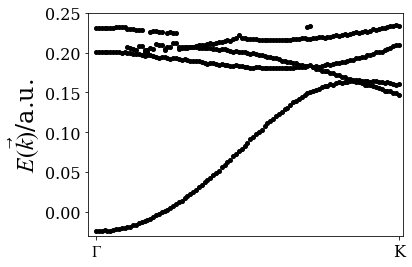

In [76]:
kk = np.genfromtxt('Thijssen_code/ch6/apw/kpoints')
for i in range(4):
    fname = 'Thijssen_code/ch6/apw/k'+'{:1d}'.format(i+1)+'.dat'
    tmp = np.genfromtxt(fname)
    plt.plot(kk[:,0],tmp[:,1],'o',c='k',markersize=4)
    
plt.axis([-0.02,0.76,-0.03,0.25])
#plt.plot([-0.02,0.76],[0.29,0.29],'--',c='r',lw=2)
plt.xticks([0.0,0.75],[r"$\Gamma$","K"])
plt.ylabel(r"$E(\vec{k})$/a.u.",fontsize=24)
figname = "APW_Cu.png"
plt.tight_layout()
plt.savefig(figname,dpi=300,format='png')
plt.show()

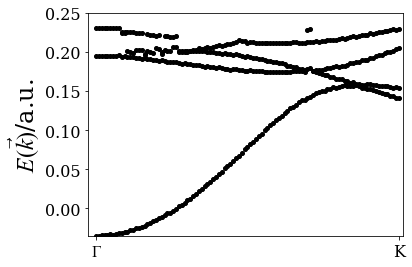

In [8]:
kk = np.genfromtxt('Thijssen_code/ch6/apw/kpoints')
for i in range(4):
    fname = 'Thijssen_code/ch6/apw/logapw.k'+'{:1d}'.format(i+1)+'.dat'
    tmp = np.genfromtxt(fname)
    plt.plot(kk[:,0],tmp[:,1],'o',c='k',markersize=4)
    
plt.axis([-0.02,0.76,-0.035,0.25])
#plt.plot([-0.02,0.76],[0.29,0.29],'--',c='r',lw=2)
plt.xticks([0.0,0.75],[r"$\Gamma$","K"])
plt.ylabel(r"$E(\vec{k})$/a.u.",fontsize=24)
figname = "LOGAPW_Cu.png"
plt.tight_layout()
plt.savefig(figname,dpi=300,format='png')
plt.show()

# Below are bands for silicon produced from semi-empirical Pseudo potential method.

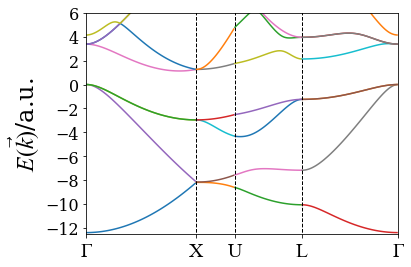

In [32]:
fname = 'Thijssen_code/ch6/BandStr_G_X'
ff = open(fname,'r')
Band1 = np.zeros((100,8))
i = -1
k = -1
for lines in ff:
    i += 1
    if i%2==1:
        k += 1
        line = lines.split()
        for j in range(8):
            Band1[k,j] = np.float(line[j])*0.5

x_for1 = np.arange(0,100,1)
fname = 'Thijssen_code/ch6/BandStr_X_U'
ff = open(fname,'r')
Band2 = np.zeros((35,8))
i = -1
k = -1
for lines in ff:
    i += 1
    if i%2==1:
        k += 1
        line = lines.split()
        for j in range(8):
            Band2[k,j] = np.float(line[j])*0.5
        
x_for2 = np.arange(100,100+35,1)
fname = 'Thijssen_code/ch6/BandStr_U_L'
ff = open(fname,'r')
Band3 = np.zeros((61,8))
i = -1
k = -1
for lines in ff:
    i += 1
    if i%2==1:
        k += 1
        line = lines.split()
        for j in range(8):
            Band3[k,j] = np.float(line[j])*0.5
        
x_for3 = np.arange(135,135+61,1)

fname = 'Thijssen_code/ch6/BandStr_L_G'
ff = open(fname,'r')
Band4 = np.zeros((87,8))
i = -1
k = -1
for lines in ff:
    i += 1
    if i%2==1:
        k += 1
        line = lines.split()
        for j in range(8):
            Band4[k,j] = np.float(line[j])*0.5
        
x_for4 = np.arange(196,196+87,1)
for i in range(8):
    plt.plot(x_for1,(Band1[:,i]-0.7383/2.0)*27.2107)
    plt.plot(x_for2,(Band2[:,i]-0.7383/2.0)*27.2107)
    plt.plot(x_for3,(Band3[:,i]-0.7383/2.0)*27.2107)
    plt.plot(x_for4,(Band4[:,i]-0.7383/2.0)*27.2107)
    
plt.xticks([0,100,135,196,196+87],\
           [r"$\Gamma$",r"$\rm{X}$",r"$\rm{U}$",r"$\rm{L}$",r"$\Gamma$"],fontsize=20)
plt.axis([0,196+87,np.min(Band1[:,0]-0.7383/2.0)*27.2107-0.1,6])
plt.yticks([-12,-10,-8,-6,-4,-2,0,2,4,6])
plt.ylabel(r"$E(\vec{k})$/a.u.",fontsize=24)
plt.plot([100,100],[-15,20],'k--',lw=1)
plt.plot([135,135],[-15,20],'k--',lw=1)
plt.plot([196,196],[-15,20],'k--',lw=1)
figname = 'semi_em_Si.png'
plt.tight_layout()
plt.savefig(figname,dpi=300,format='png')
plt.show()